Numerical Differentiation
========================
Numeric differentiation is a technique used to approximate the derivative of a function when an analytical derivative is difficult or impossible to obtain. It is widely used to analyze rates of change in discrete data sets or complex functions. The most common methods include finite difference approximations, such as **forward**, **backward**, and **central** differences, which estimate derivatives using function values at nearby points. While numerical differentiation is straightforward to implement, it can introduce errors due to finite precision and step size selection, requiring careful consideration of accuracy and stability.

## Forward/Backward Difference 

The forward/backward difference uses the traditional equation for differentiation:

$$\frac{dy}{dx} = y'(x) =  \frac{y(x+\Delta x) - y(x)}{h}$$

where $h$ is the **step size**, also denoted as $dx\approx\Delta x$.

In order to numerically evaluate a derivative $y'(x)=dy/dx$ at point $x_0$, we approximate is by using finite differences.
Therefore we find: 

$dx \approx \Delta x =x_1-x_0 = h$

$dy \approx \Delta y =y_1-y_0= y(x_1)-y(x_0) = y(x_0+\Delta x)-y(x_0)$

Then we re-write the derivative in terms of discrete differences as:
$$\frac{dy}{dx} \approx \frac{\Delta y}{\Delta x}$$

#### Example

Let's look at the accuracy of this approximation in terms of the interval $\Delta x$. In our first example we will evaluate the derivative of $y=x^2$ at $x=1$.

In [42]:
dx = 1.
x = 1.
step = []
er = []
while(dx > 1.e-16):
    dy = (x+dx)*(x+dx)-x*x
    d = dy / dx
    step.append(dx)
    er.append(d-2)
    print("%6.0e %20.16f %20.16f" % (dx, d, d-2.))
    dx = dx / 10.
    

 1e+00   3.0000000000000000   1.0000000000000000
 1e-01   2.1000000000000019   0.1000000000000019
 1e-02   2.0100000000000007   0.0100000000000007
 1e-03   2.0009999999996975   0.0009999999996975
 1e-04   2.0000999999991720   0.0000999999991720
 1e-05   2.0000100000139298   0.0000100000139298
 1e-06   2.0000009999243669   0.0000009999243669
 1e-07   2.0000001010878061   0.0000001010878061
 1e-08   1.9999999878450576  -0.0000000121549424
 1e-09   2.0000001654807416   0.0000001654807416
 1e-10   2.0000001654807416   0.0000001654807416
 1e-11   2.0000001654807416   0.0000001654807416
 1e-12   2.0001778011646816   0.0001778011646816
 1e-13   1.9984014443252816  -0.0015985556747184
 1e-14   1.9984014443252816  -0.0015985556747184
 1e-15   2.2204460492503131   0.2204460492503131
 1e-16   0.0000000000000000  -2.0000000000000000


Text(0, 0.5, 'error')

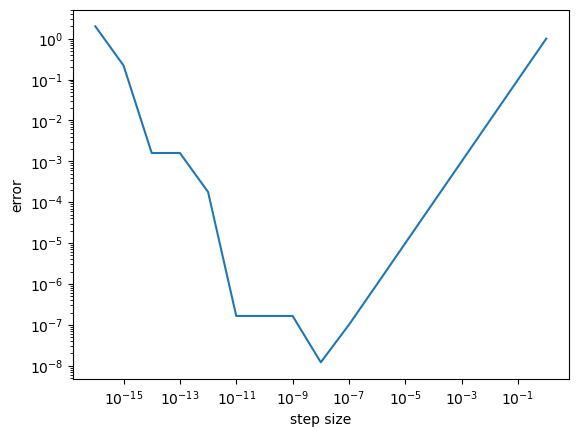

In [43]:
import matplotlib.pyplot as plt
# need absolute values for log plot
ers = [abs(x) for x in er ]
plt.loglog(step,ers)
plt.xlabel('step size')
plt.ylabel('error')

Why is it that the sequence does not converge? This is due to the round-off errors in the representation of the floating point numbers. To see this, we can simply type:

In [44]:
((1.+0.0001)*(1+0.0001)-1)

0.0002000099999999172

Let's try using powers of 1/2

In [45]:
dx = 1.
x = 1.
step2 = []
er2 = []
while(dx > 1.e-16):
    dy = (x+dx)*(x+dx)-x*x
    d = dy / dx
    step2.append(dx)
    er2.append(d-2)
    print("%8.5e %20.16f %20.16f" % (dx, d, d-2.))
    dx = dx / 2.

1.00000e+00   3.0000000000000000   1.0000000000000000
5.00000e-01   2.5000000000000000   0.5000000000000000
2.50000e-01   2.2500000000000000   0.2500000000000000
1.25000e-01   2.1250000000000000   0.1250000000000000
6.25000e-02   2.0625000000000000   0.0625000000000000
3.12500e-02   2.0312500000000000   0.0312500000000000
1.56250e-02   2.0156250000000000   0.0156250000000000
7.81250e-03   2.0078125000000000   0.0078125000000000
3.90625e-03   2.0039062500000000   0.0039062500000000
1.95312e-03   2.0019531250000000   0.0019531250000000
9.76562e-04   2.0009765625000000   0.0009765625000000
4.88281e-04   2.0004882812500000   0.0004882812500000
2.44141e-04   2.0002441406250000   0.0002441406250000
1.22070e-04   2.0001220703125000   0.0001220703125000
6.10352e-05   2.0000610351562500   0.0000610351562500
3.05176e-05   2.0000305175781250   0.0000305175781250
1.52588e-05   2.0000152587890625   0.0000152587890625
7.62939e-06   2.0000076293945312   0.0000076293945312
3.81470e-06   2.000003814697

Text(0, 0.5, 'error')

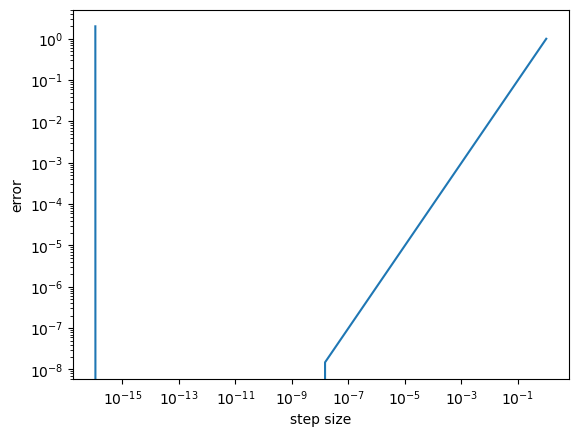

In [46]:
# need absolute values for log plot
ers2 = [abs(x) for x in er2 ]
plt.loglog(step2,ers2)
plt.xlabel('step size')
plt.ylabel('error')

That appeared to have less trouble as the step size got smaller. Why is that?

## Central (Midpoint) Difference

The central difference method is a more accurate numerical differentiation technique compared to forward or backward differences because it utilizes points on both sides of the target point to estimate the derivative. It is given by the formula:
$$ \frac{dy}{dx} \approx \frac{y(x_0+\frac{h}{2})-y(x_0-\frac{h}{2})}{h}.$$
By averaging symmetric function values around $x$, the central difference method reduces truncation error to the order of $\mathcal{O}(h^2)$


For a more complex function we may need to import it from the math module. For instance, let's calculate the derivative of $sin(x)$ at $x=\pi/4$, including both the forward and central differences.

In [47]:
from math import sin, sqrt, pi
dx = 1.
data = []
while(dx > 1.e-16):
    x = pi/4.
    d1 = sin(x+dx) - sin(x); #forward
    d2 = sin(x+dx*0.5) - sin(x-dx*0.5); # midpoint
    d1 = d1 / dx;
    d2 = d2 / dx;
    e1 = d1-sqrt(2.)/2.
    e2 = d2-sqrt(2.)/2.
    print("%8.5e %20.16f %20.16f %20.16f %20.16f" % (dx, d1, e1, d2, e2) )
    data.append([dx,d1,e1,d2,e2])
    dx = dx / 2.

1.00000e+00   0.2699544827129281  -0.4371522984736195   0.6780100988420897  -0.0290966823444578
5.00000e-01   0.5048856975964857  -0.2022210835900619   0.6997640691250939  -0.0073427120614536
2.50000e-01   0.6118351194488105  -0.0952716617377370   0.7052667953545546  -0.0018399858319930
1.25000e-01   0.6611301360648305  -0.0459766451217171   0.7066465151141275  -0.0004602660724201
6.25000e-02   0.6845566203276618  -0.0225501608588857   0.7069916978116630  -0.0001150833748845
3.12500e-02   0.6959440534591224  -0.0111627277274252   0.7070780092891873  -0.0000287718973603
1.56250e-02   0.7015538499518428  -0.0055529312347048   0.7070995881463560  -0.0000071930401916
7.81250e-03   0.7043374663312534  -0.0027693148552942   0.7071049829223881  -0.0000017982641595
3.90625e-03   0.7057239167464786  -0.0013828644400690   0.7071063316202526  -0.0000004495662950
1.95312e-03   0.7064157978737171  -0.0006909833128305   0.7071066687949497  -0.0000001123915979
9.76562e-04   0.7067614018393442  -0.000

In [48]:
import numpy as np
arraydata = np.array(data)

What do you notice? Which one does better?

Text(0, 0.5, 'error')

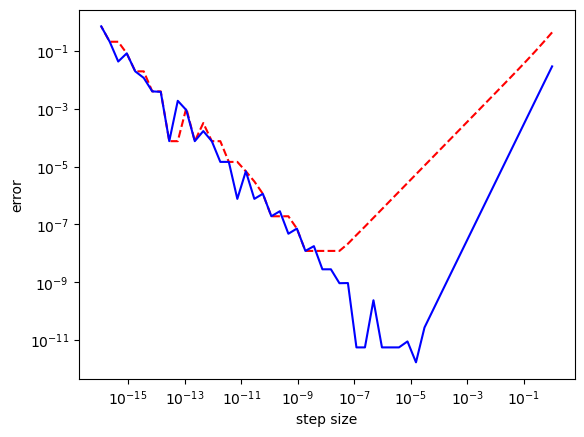

In [49]:
import matplotlib.pyplot as plt
plt.loglog(arraydata[:,0],abs(arraydata[:,2]),'r--')
plt.loglog(arraydata[:,0],abs(arraydata[:,4]),'b')
plt.xlabel('step size')
plt.ylabel('error')

A more in-depth discussion about round-off errors in numerical differentiation can be found <a href="http://www.uio.no/studier/emner/matnat/math/MAT-INF1100/h10/kompendiet/kap11.pdf">here</a>

### Special functions in **numpy**

numpy provides a simple method **diff()** to calculate the numerical derivatives of a dataset stored in an array by forward differences. The function **gradient()** will calculate the derivatives by midpoint (or central) difference, that provides a more accurate result. 

[ 1.  2.  4.  6.  8. 10. 12. 14. 16. 17.]
[1. 2. 2. 2. 2. 2. 2. 2. 1.]


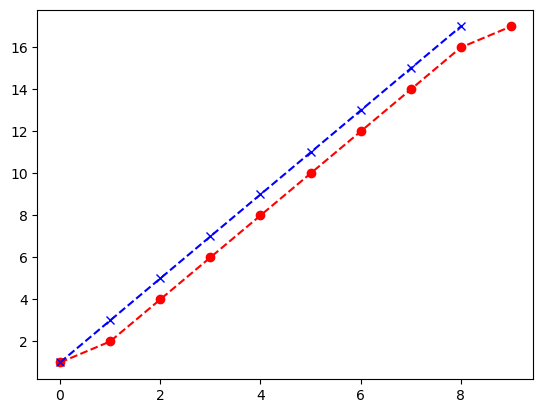

In [50]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

y = lambda x: x*x

x1 = np.arange(0,10,1)
x2 = np.arange(0,10,0.1)

y1 = np.gradient(y(x1), 1.)
print(y1)
print(np.diff(y1))
pyplot.plot(x1,np.gradient(y(x1),1.),'r--o');
pyplot.plot(x1[:x1.size-1],np.diff(y(x1))/np.diff(x1),'b--x');

Notice above that **gradient()** uses forward and backward differences at the two ends.

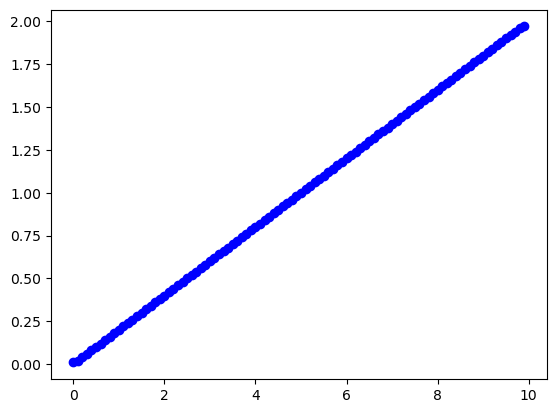

In [51]:
pyplot.plot(x2,np.gradient(y(x2)),'b--o');

More discussion about numerical differentiation, including higher order methods with error extrapolation can be found <a href="http://young.physics.ucsc.edu/115/diff.pdf">here</a>. 

## `scipy.differentiate.derivative`

The `derivative` function computes numerical derivatives using an adaptive Richardson extrapolation method. It takes a function `f` and array of points `x`, returning a result object with:
- `.df` - the derivative values
- `.error` - error estimates  
- `.success` - convergence flags
- `.nit` - number of iterations performed
- `.nfev` - number of function evaluations

Key parameters include:
- `order` - order of finite difference formula (default 8)
- `initial_step` - initial step size (default 0.5)
- `step_factor` - step reduction factor per iteration (default 2.0)
- `tolerances` - dict with 'atol' and 'rtol' keys for convergence criteria
- `maxiter` - maximum iterations (default 10)
- `step_direction` - 0 for central differences, -1 for backward, +1 for forward

The algorithm iteratively refines the derivative estimate by reducing the step size until convergence. Unlike older derivative functions, this automatically adapts and provides error estimates, making it robust for most smooth functions without manual tuning.
```python
result = derivative(f, x, args=(), tolerances=None, maxiter=10, 
                   order=8, initial_step=0.5, step_factor=2.0, 
                   step_direction=0)
```


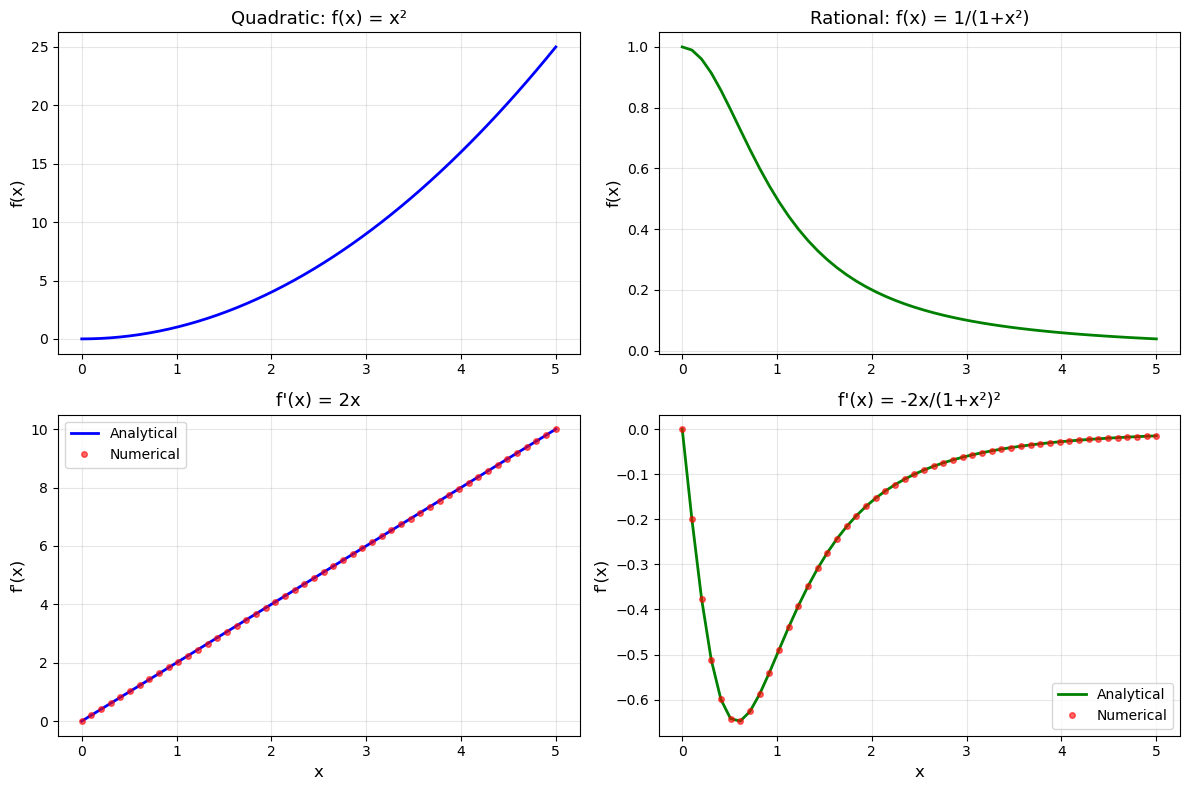

Quadratic function:
  Max absolute error: 7.46e-14
  Max error estimate: 1.07e-13
  All converged: True

Rational function:
  Max absolute error: 1.15e-11
  Max error estimate: 2.74e-09
  All converged: False


In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.differentiate import derivative

# Define functions and their analytical derivatives
def quadratic(x):
    """f(x) = x^2"""
    return x**2

def dquadratic(x):
    """f'(x) = 2x"""
    return 2*x

def rational(x):
    """f(x) = 1/(1+x^2)"""
    return 1 / (1 + x**2)

def drational(x):
    """f'(x) = -2x/(1+x^2)^2"""
    return -2*x / (1 + x**2)**2

# Evaluate over a domain
x = np.linspace(0, 5, 50)

# Compute numerical derivatives
quad_result = derivative(quadratic, x)
rat_result = derivative(rational, x)

# Compute analytical derivatives
quad_analytical = dquadratic(x)
rat_analytical = drational(x)

# Plot comparison
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Quadratic function
axes[0, 0].plot(x, quadratic(x), 'b-', linewidth=2)
axes[0, 0].set_ylabel('f(x)', fontsize=12)
axes[0, 0].set_title('Quadratic: f(x) = x²', fontsize=13)
axes[0, 0].grid(True, alpha=0.3)

# Quadratic derivative
axes[1, 0].plot(x, quad_analytical, 'b-', linewidth=2, label='Analytical')
axes[1, 0].plot(x, quad_result.df, 'ro', markersize=4, alpha=0.6, label='Numerical')
axes[1, 0].set_xlabel('x', fontsize=12)
axes[1, 0].set_ylabel("f'(x)", fontsize=12)
axes[1, 0].set_title("f'(x) = 2x", fontsize=13)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Rational function
axes[0, 1].plot(x, rational(x), 'g-', linewidth=2)
axes[0, 1].set_ylabel('f(x)', fontsize=12)
axes[0, 1].set_title('Rational: f(x) = 1/(1+x²)', fontsize=13)
axes[0, 1].grid(True, alpha=0.3)

# Rational derivative
axes[1, 1].plot(x, rat_analytical, 'g-', linewidth=2, label='Analytical')
axes[1, 1].plot(x, rat_result.df, 'ro', markersize=4, alpha=0.6, label='Numerical')
axes[1, 1].set_xlabel('x', fontsize=12)
axes[1, 1].set_ylabel("f'(x)", fontsize=12)
axes[1, 1].set_title("f'(x) = -2x/(1+x²)²", fontsize=13)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('derivative_comparison.png', dpi=150)
plt.show()

# Print results
print("Quadratic function:")
print(f"  Max absolute error: {np.max(np.abs(quad_result.df - quad_analytical)):.2e}")
print(f"  Max error estimate: {np.max(quad_result.error):.2e}")
print(f"  All converged: {np.all(quad_result.success)}")

print("\nRational function:")
print(f"  Max absolute error: {np.max(np.abs(rat_result.df - rat_analytical)):.2e}")
print(f"  Max error estimate: {np.max(rat_result.error):.2e}")
print(f"  All converged: {np.all(rat_result.success)}")

In [56]:
quad_result
rat_result.nfev

array([27, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11],
      dtype=int32)

`derivative` returns a dictionary and may have more information than what you want. `gradient` seems to be preferred for numerical data by some sources.

In [57]:
# Create a 2D array representing your function
f = np.array([[1, 2, 6], [3, 4, 5]])

# Calculate the gradient
gradient = np.gradient(f)

# gradient is a tuple of two arrays: 
# - gradient[0]: gradient along the rows (y-axis)
# - gradient[1]: gradient along the columns (x-axis)
print(gradient)

(array([[ 2.,  2., -1.],
       [ 2.,  2., -1.]]), array([[1. , 2.5, 4. ],
       [1. , 1. , 1. ]]))


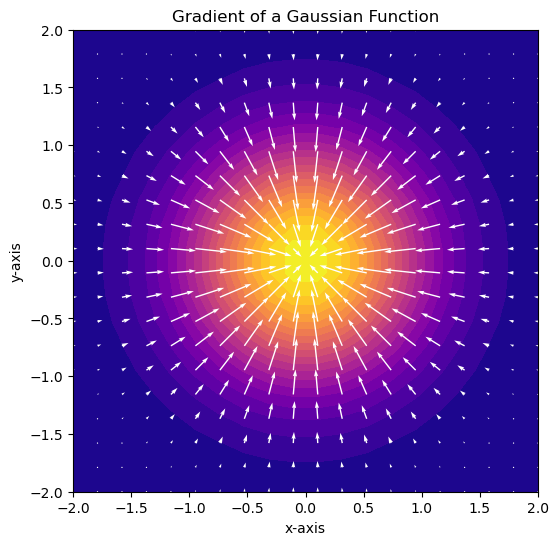

In [60]:
# Define grid size
x = np.linspace(-2, 2, 20)  # 20 points from -2 to 2
y = np.linspace(-2, 2, 20)

# Create meshgrid
X, Y = np.meshgrid(x, y)

# Define function f(x, y) = exp(-x^2 - y^2)
F = np.exp(-(X**2 + Y**2))

# Compute numerical gradient
# Computes gradient with respect to x and y
dFdx, dFdy = np.gradient(F, x, y) 

# Plot function
fig, ax = plt.subplots(figsize=(6, 6))
ax.contourf(X, Y, F, levels=20, cmap="plasma")  # Filled contour plot of f(x,y)
ax.quiver(X, Y, dFdy, dFdx, color='white')  # Quiver plot of gradient vectors
ax.set_title("Gradient of a Gaussian Function")
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
plt.show()



One way to improve the roundoff errors is by simply using the **decimal** package, which provides a higher precision floating point number representation.

In [ ]:
from decimal import Decimal

dx = Decimal("1.")
while(dx >= Decimal("1.e-10")):
    x = Decimal("1.")
    dy = (x+dx)*(x+dx)-x*x
    d = dy / dx
    print("%6.0e %20.16f %20.16f" % (dx, d, d-Decimal("2.")))
    dx = dx / Decimal("10.")

# Automatic Differentiation

Even better than numerical differentiation is automatic differentiation or *autodiff*, which is crucial to breakthroughs in machine learning.

This is a technique that allows to evaluate the derivative of a function to machine precision, without the need to use finite differences, using the fact that autodiff package knows the analytical form of the derivative for certain functions. It then builds a computational graph that allows for the evaluation of the derivative of a function using the chain rule.

## Sympy
`sympy`, the symbolic mathematics library, allows differentiation of expressions.

In [62]:
import sympy as sp

x = sp.symbols('x')
f = x**2 + 3*x + 5
dfdx = sp.diff(f, x)

print(dfdx)  

2*x + 3


## Autograd (may need to install)
`autograd` is a Python library that enables automatic differentiation of native Python and NumPy functions. It is lightweight and useful for computing derivatives of functions without needing to manually derive them.
Some key features of `autograd`:
- Computes gradients automatically.
- Works with standard Python and NumPy functions.
- Supports higher-order derivatives (e.g., second-order derivatives).
- Can differentiate through loops, branches, and recursion.

You should think about using `autograd`:
- If you need automatic differentiation but don’t want to manually compute derivatives.
- If you're working with NumPy-based code (since jax require different frameworks).
- If you need higher-order derivatives, like Hessians and Jacobians.

Please note some limitations of `autograd`
- No support for control flow like if statements depending on values. (JAX solves this.)
- Slower than JAX or TensorFlow for large-scale computations.

In [63]:
import autograd.numpy as np
import autograd as ag

def f(x):
    return x**2 + 3*x + 5

dfdx = ag.grad(f)  # Get the gradient function
print(dfdx(2.0))  # Evaluate derivative at x=2

7.0


`autograd` can perform partial derivatives, calculate jacobians, and compute hessian matrices.

In [64]:
def f(x, y):
    return x**2 + y**3

dfdx = ag.grad(f, argnum=0)  # ∂f/∂x
dfdy = ag.grad(f, argnum=1)  # ∂f/∂y
print(dfdx)
print(dfdx(2.0, 3.0))  
print(dfdy(2.0, 3.0))  

<function unary_to_nary.<locals>.nary_operator.<locals>.nary_f at 0x00000209C72ACA40>
4.0
27.0


In [65]:
def jb(x):
    return np.array([x[0]**2, x[1]**3])  # Vector-valued function

jacob = ag.jacobian(jb)
print(jacob(np.array([2.0, 3.0])))  


[[ 4.  0.]
 [ 0. 27.]]


In [66]:
def hs(x):
    return x[0]**2 + x[1]**3

hess = ag.hessian(hs)
print(hess(np.array([1.0, 2.0])))  # Output: Hessian matrix


[[ 2.  0.]
 [ 0. 12.]]


## Jax

In [ ]:
import jax
import jax.numpy as jnp

In [ ]:
def f(x):
    return 2*x**2

In [ ]:
grad_f = jax.grad(f)

In [ ]:
x = 13.0
print(f"The gradient of f at x = {x} is {grad_f(x):.20f}")

Now compare this to the finite difference technique

In [67]:
dx = 1.
x = 13.
while(dx > 1.e-16):
    dy = (x+dx)*(x+dx)-x*x
    d = dy / dx
    print("%6.0e %20.16f %20.16f" % (dx, d, d-26.))
    dx = dx / 10.

 1e+00  27.0000000000000000   1.0000000000000000
 1e-01  26.0999999999998522   0.0999999999998522
 1e-02  26.0099999999994225   0.0099999999994225
 1e-03  26.0009999999795127   0.0009999999795127
 1e-04  26.0000999998055704   0.0000999998055704
 1e-05  26.0000099984836162   0.0000099984836162
 1e-06  26.0000009859595558   0.0000009859595558
 1e-07  25.9999998775128844  -0.0000001224871156
 1e-08  26.0000035723351139   0.0000035723351139
 1e-09  26.0000092566769965   0.0000092566769965
 1e-10  25.9998955698392749  -0.0001044301607251
 1e-11  25.9973376159905385  -0.0026623840094615
 1e-12  26.0058641288196633   0.0058641288196633
 1e-13  25.8637555816676432  -0.1362444183323568
 1e-14  28.4217094304040039   2.4217094304040039
 1e-15  56.8434188608080078  30.8434188608080078
 1e-16   0.0000000000000000 -26.0000000000000000


In [ ]:
grad_f(13.0)

There is no error on the autodiff result because it knows $dy/dx$ as a *function*, rather than computing it by numerical approximation

Ok, so that's great and all, but autodiff really gets its legs when you have a more complicated function. Derivatives of a more complicated function that is composed of many smaller functions require many applications of the chain rule. Autodiff does this for you.

In [ ]:
def f_complicated(x):
    return jnp.cos(jnp.sin(jnp.tanh(x)))

In [ ]:
x = np.linspace(0,3.14,100)
plt.plot(x,f_complicated(x))

In [ ]:
grad_fcomp = jax.grad(f_complicated)

In [ ]:
x = np.linspace(0,3.14,100)
plt.plot(x,[grad_fcomp(j) for j in x])
plt.plot(x,f_complicated(x))